In [1]:
import tensorflow as tf 
from keras.layers import Layer
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
def preprocess(file_path):
    # read in img from file path
    byte_img = tf.io.read_file(file_path)
    # load in the img
    img = tf.io.decode_jpeg(byte_img)
    # Preprocessing steps - resizing the img to 100x100
    img = tf.image.resize(img, (100,100))
    # scale image between 1 & 0
    img = img/255.0
    return img

In [3]:
class L1Dist(Layer):
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embbedding):
        return tf.math.abs(input_embedding - validation_embbedding)

In [4]:
l1 = L1Dist()

In [5]:
# Reload model 
Fear_model = tf.keras.models.load_model("V/LIRIS_VGG_Fear.h5", custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [6]:
# Reload model 
Happy_model = tf.keras.models.load_model("V/LIRIS_VGG_Happy.h5", custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [7]:
# Reload model 
Sad_model = tf.keras.models.load_model("V/LIRIS_VGG_Sad.h5", custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [8]:
# Reload model 
Surprise_model = tf.keras.models.load_model("V/LIRIS_VGG_Surprise.h5", custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [9]:
def Fear(image):
    # Load the preprocessed image into a Tensor
    image = preprocess(image)
    image = tf.expand_dims(image, 0)
    folder_path = "LIRIS_Test/Fear"
    # Get the list of all image paths in the folder
    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # Randomly select 10 image paths from the list

    
    # Preprocess and expand the images in the folder
    images = [preprocess(path) for path in image_paths]
    images = [tf.expand_dims(img, 0) for img in images]

    # Make predictions for each pairing
    predictions = [Fear_model.predict([image, img])[0][0] for img in images]

    # Threshold the predictions to get the labels
    labels = [1 if pred > 0.5 else 0 for pred in predictions]

    # Count the number of positive predictions
    positive_count = sum(labels)

    return positive_count


In [10]:
def Happy(image):
    # Load the preprocessed image into a Tensor
    image = preprocess(image)
    image = tf.expand_dims(image, 0)
    folder_path = "LIRIS_Test/Happy"
    # Get the list of all image paths in the folder
    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # Randomly select 10 image paths from the list

    
    # Preprocess and expand the images in the folder
    images = [preprocess(path) for path in image_paths]
    images = [tf.expand_dims(img, 0) for img in images]

    # Make predictions for each pairing
    predictions = [Happy_model.predict([image, img])[0][0] for img in images]

    # Threshold the predictions to get the labels
    labels = [1 if pred > 0.5 else 0 for pred in predictions]

    # Count the number of positive predictions
    positive_count = sum(labels)

    return positive_count


In [11]:
def Sad(image):
    # Load the preprocessed image into a Tensor
    image = preprocess(image)
    image = tf.expand_dims(image, 0)
    folder_path = "LIRIS_Test/Sad"
    # Get the list of all image paths in the folder
    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # Randomly select 10 image paths from the list

    
    # Preprocess and expand the images in the folder
    images = [preprocess(path) for path in image_paths]
    images = [tf.expand_dims(img, 0) for img in images]

    # Make predictions for each pairing
    predictions = [Sad_model.predict([image, img])[0][0] for img in images]

    # Threshold the predictions to get the labels
    labels = [1 if pred > 0.5 else 0 for pred in predictions]

    # Count the number of positive predictions
    positive_count = sum(labels)

    return positive_count


In [12]:
def Surprise(image):
    # Load the preprocessed image into a Tensor
    image = preprocess(image)
    image = tf.expand_dims(image, 0)
    folder_path = "LIRIS_Test/Surprise"
    # Get the list of all image paths in the folder
    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # Randomly select 10 image paths from the list

    
    # Preprocess and expand the images in the folder
    images = [preprocess(path) for path in image_paths]
    images = [tf.expand_dims(img, 0) for img in images]

    # Make predictions for each pairing
    predictions = [Surprise_model.predict([image, img])[0][0] for img in images]

    # Threshold the predictions to get the labels
    labels = [1 if pred > 0.5 else 0 for pred in predictions]

    # Count the number of positive predictions
    positive_count = sum(labels)

    return positive_count


In [13]:
def Emotion(folder_path):
    correct_count = 0
    total_count = len(os.listdir(folder_path))
    prediction_labels = []
    
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)

        # Load the input image
        img = cv2.imread(img_path)

        # Get the counts for each emotion
        fear_count = Fear(img_path)
        happy_count = Happy(img_path)
        sad_count = Sad(img_path)
        surprise_count = Surprise(img_path)

        # Get the emotion with the highest count
        counts = [fear_count, happy_count, sad_count, surprise_count]
        
        # Check if no emotions were detected
        if sum(counts) == 0:
            prediction = "No emotion detected"
        else:
            prediction = ["Fear", "Happy", "Sad", "Surprise"][counts.index(max(counts))]

        # Get the label
        filename, file_extension = os.path.splitext(os.path.basename(img_path))
        label = filename.split("_")[0]

        # Check if the prediction is correct
        if prediction == label:
            correct_count += 1
        
        prediction_labels.append((prediction, label))

    accuracy = correct_count / total_count
    print("Accuracy: {:.2f}".format(accuracy))
    
    # Create a Pandas dataframe from the prediction labels
    df = pd.DataFrame(prediction_labels, columns=['Prediction', 'Label'])
    
    # Generate a pivot table to get the count of each combination of prediction and label
    pivot_table = pd.pivot_table(df, index='Prediction', columns='Label', aggfunc=len, fill_value=0)
    
    # Calculate the correlation matrix
    #corr = pivot_table.corr()
    
    # Print the correlation matrix
    #print(corr)
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
    plt.title("Correlation Matrix")
    plt.xlabel("True Label")
    plt.ylabel("Prediction")
    plt.show()


1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 86ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 99ms/step


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 107ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 96ms/step


1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 0s 100ms/step
Accuracy: 0.81


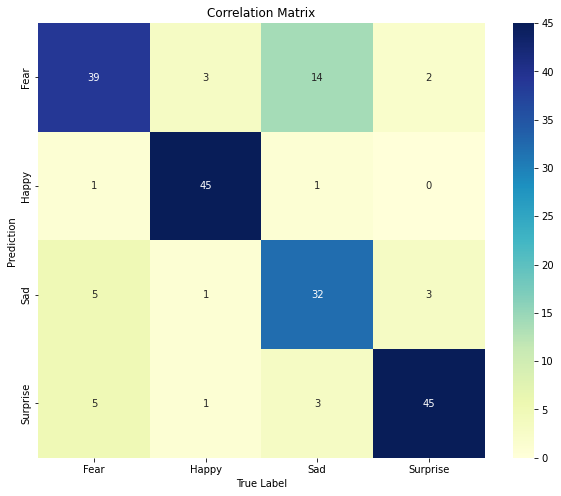

In [14]:
Emotion("LIRIS")